<a href="https://colab.research.google.com/github/gulabpatel/NLP_Basics/blob/main/Part%201.4%3A%20Word2Vec_gensim_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arxiv : https://arxiv.org/pdf/1301.3781.pdf

Paper : https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf

Code walkthrough video : https://www.youtube.com/watch?v=MtM9QrCjuK4


In [1]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [2]:
for i, word in enumerate(wv.vocab):
    if i == 10:
        break
    print(word)

</s>
in
for
that
is
on
##
The
with
said


In [3]:
vec_king = wv['king']
print(vec_king)

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [5]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [6]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.853219211101532), ('vehicle', 0.8175784349441528), ('pickup_truck', 0.7763689160346985), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.756571888923645)]


In [7]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [8]:
import json
import pandas as pd
import string
import time
from fastai import *
from fastai.vision import *

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/NLP_Basics/master/Dataset/Amazon_cell_phone_reviews.csv')
data

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [19]:
df=data
df = df.drop(columns=['name', 'helpfulVotes','date','title','verified'])
df1 = df.rename(columns = {'body': 'reviewText', 'asin': 'productID'}, inplace = False)

In [20]:
df1.dropna(axis = 0, how ='any',inplace=True) 
df1.drop_duplicates(subset=['rating','reviewText'],keep='first',inplace=True)
df1.head()

,productID,rating,reviewText
0,B0000SX2UC,3,I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,3,"I love the phone and all, because I really did..."
4,B0000SX2UC,4,The phone has been great for every purpose it ...


In [21]:
def clean_text(text ): 
    delete_dict = {sp_character: ' ' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower().split(' ')

In [22]:
df2 = df1.sample(n=20000)
df2['reviewText']= df2['reviewText'].apply(clean_text)

In [24]:
sentences = df2['reviewText'].tolist()

In [25]:
print(len(sentences))
print(sentences[1])
print(sentences[200])

20000
['phone', 'works', 'well', 'but', 'was', 'very', 'very', 'disappointed', 'packing', 'and', 'low', 'quality', 'charger', 'phone', 'was', 'not', 'cleaned', 'properly', 'was', 'having', 'dust', 'near', 'home', 'button']
['this', 'phone', 'will', 'not', 'work', 'with', 'sprint', 'boost', 'mobile', 'phone', 'and', 'will', 'not', 'work', 'with', 'sprint', 'post', 'paid', 'accounts', 'even', 'contacted', 'the', 'seller', 'about', 'the', 'phone', 'had', 'confused', 'the', 'type', 'phone', 'was', 'selling', 'very', 'disappointed', 'ordered', 'for', 'son', 'picked', 'saturday', 'from', 'his', 'apartment', 'comples', 'just', 'arrived', 'home', 'today', 'and', 'found', 'out', 'boost', 'mobile', 'phone', 'which', 'will', 'not', 'work', 'with', 'sorint', 'accounts', 'very', 'disappointed', 'much', 'for', 'the', 'marketplace']


In [26]:
import gensim

In [27]:
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec

# init callback class
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        elif self.epoch % 100 == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        
        
        self.epoch += 1
        self.loss_previous_step = loss

In [ ]:
# init word2vec class
w2v_model = Word2Vec(size = 300,
                     window = 15,
                     min_count = 2,
                     workers = 20,
                     sg = 1,
                     negative = 5,
                     sample = 1e-5)
# build vovab


w2v_model.build_vocab(sentences)

  
# train the w2v model
start = time.time()
w2v_model.train(sentences, 
                total_examples=w2v_model.corpus_count, 
                epochs=1001, 
                report_delay=1,
                compute_loss = True, # set compute_loss = True
                callbacks=[callback()]) # add the callback class
end = time.time()


print("elapsedtime in seconds :"+ str(end - start))
# save the word2vec model

In [29]:
w2v_model.save('word2vec.model')

***
Let us reload our word2vec model and perform operations using it
***

In [31]:
reloaded_w2v_model = Word2Vec.load('/content/word2vec.model')
words = list(reloaded_w2v_model.wv.vocab)
print('Vocab size: '+str(len(words)))
w1 = 'cancellation'
print("Top 3 words similar to cancellation:",\
      reloaded_w2v_model.wv.most_similar(positive = w1,topn =3))
w1 = 'poor'
print("Top 3 words similar to poor:",\
      reloaded_w2v_model.wv.most_similar(positive = w1,topn =3))
print("Similarity between earphones and headphones:"+\
      str(reloaded_w2v_model.wv.similarity(w1="earphones",w2="headphones")))
print("Similarity between charger and charge:"+\
      str(reloaded_w2v_model.wv.similarity(w1="charger",w2="charge")))

Vocab size: 11145
Top 3 words similar to cancellation: [('declared', 0.5914719700813293), ('enhancing', 0.5022028088569641), ('wlan', 0.47891634702682495)]
Top 3 words similar to poor: [('orlando', 0.36951470375061035), ('antena', 0.36393311619758606), ('quality', 0.3365371823310852)]
Similarity between earphones and headphones:0.16372164
Similarity between charger and charge:0.6349773


***
Let us use TSNE to do reduce features
Code from: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
***

In [32]:
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    #labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(reloaded_w2v_model)

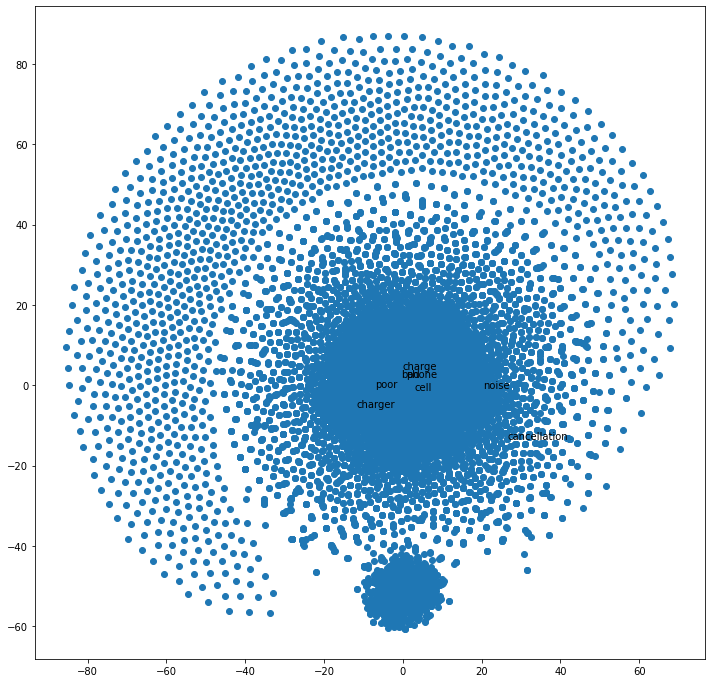

In [33]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    
    
    indices = list(range(len(labels)))
    #selected_indices = random.sample(indices, 25)
    selected_indices=[]
    index = labels.index("cell")
    selected_indices.append(index)
    index = labels.index("phone")
    selected_indices.append(index)
    index = labels.index("noise")
    selected_indices.append(index)
    index = labels.index("cancellation")
    selected_indices.append(index)
    index = labels.index("charger")
    selected_indices.append(index)
    index = labels.index("charge")
    selected_indices.append(index)
    index = labels.index("poor")
    selected_indices.append(index)
    index = labels.index("bad")
    selected_indices.append(index)
    
    
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))



plot_function = plot_with_matplotlib


plot_function(x_vals, y_vals, labels)